# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Yoga Samudra
- Email: 08samudra@gmail.com
- Id Dicoding: 08samudra

## 1. Persiapan

### 1.1 Menyiapkan library yang dibutuhkan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### 1.2 Menyiapkan data yang akan diguankan

In [2]:
# Load dataset
file_path = "datasets/data.csv"
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan informasi dasar tentang dataset
print("Dimensi Data:", df.shape)
print("\nInfo Dataset:")
print(df.info())

# Melihat beberapa data pertama
print("\nPreview Data:")
print(df.head())

Dimensi Data: (4424, 37)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification  

#### **Struktur Dataset**
Dataset memiliki beberapa variabel yang dapat dikategorikan sebagai berikut:

##### **1. Informasi Demografi**
- `Marital_status` : Status pernikahan mahasiswa *(1 - single, 2 - married, dst.)*
- `Nationality` : Kewarganegaraan mahasiswa *(1 - Portuguese, 2 - German, dst.)*
- `Gender` : Jenis kelamin mahasiswa *(1 - male, 0 - female)*
- `Age_at_enrollment` : Usia mahasiswa saat mendaftar *(Numerik)*
- `Displaced` : Apakah mahasiswa merupakan orang yang terdampak *(1 - yes, 0 - no)*

##### **2. Informasi Akademik**
- `Application_mode` : Metode pendaftaran yang digunakan *(1 - 1st phase - general contingent, dst.)*
- `Application_order` : Urutan aplikasi pendaftaran mahasiswa *(0 - pertama pilihan, 9 - pilihan terakhir)*
- `Previous_qualification` : Pendidikan sebelumnya *(1 - Secondary education, dst.)*
- `Previous_qualification_grade` : Nilai pendidikan sebelumnya *(Skala 0 - 200)*
- `Admission_grade` : Nilai penerimaan mahasiswa *(Skala 0 - 200)*
- `Course` : Jurusan yang diambil mahasiswa *(33 - Biofuel Production Technologies, dst.)*
- `Daytime_evening_attendance` : Kelas pagi atau malam *(1 - daytime, 0 - evening)*
- `Educational_special_needs` : Apakah mahasiswa memiliki kebutuhan khusus *(1 - yes, 0 - no)*

##### **3. Informasi Ekonomi dan Sosial**
- `Mothers_qualification` & `Fathers_qualification` : Pendidikan orang tua *(1 - Secondary Education, dst.)*
- `Mothers_occupation` & `Fathers_occupation` : Pekerjaan orang tua *(0 - Student, dst.)*
- `Debtor` : Apakah mahasiswa memiliki tunggakan *(1 - yes, 0 - no)*
- `Tuition_fees_up_to_date` : Apakah pembayaran kuliah mahasiswa lancar *(1 - yes, 0 - no)*
- `Scholarship_holder` : Apakah mahasiswa mendapatkan beasiswa *(1 - yes, 0 - no)*

##### **4. Informasi Akademik Semesteran**
- `Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_1st_sem_evaluations`, `Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_grade`, `Curricular_units_1st_sem_without_evaluations`
- `Curricular_units_2nd_sem_credited`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_2nd_sem_evaluations`, `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`, `Curricular_units_2nd_sem_without_evaluations`

##### **5. Indikator Ekonomi**
- `Unemployment_rate` : Tingkat pengangguran di wilayah mahasiswa *(Persentase)*
- `Inflation_rate` : Tingkat inflasi ekonomi saat mahasiswa mendaftar *(Persentase)*
- `GDP` : Produk Domestik Bruto sebagai indikator ekonomi *(Numerik)*

##### **6. Target Variabel**
- `Status` : Status akhir mahasiswa *(Dropout, Enrolled, atau Graduate)*

---

### 1.3 Penanganan *Missing Values* dan Data Duplikat

Cek *Missing Values*

In [3]:
# Mengecek missing values
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Hasil cek dari *missing values* adalah 0

Cek Data Duplikat

In [4]:
# Mengecek jumlah data duplikat
print("Jumlah Data Duplikat:", df.duplicated().sum())

Jumlah Data Duplikat: 0


Hasil cek dari data duplikat adalah 0

## 2. Data Understanding

### 2.1 Statistik Deskriptif


Memeriksa distribusi data numerik dan kategorikal

In [5]:
# Statistik deskriptif untuk data numerik
stats_numerik = df.describe().T

text_stats_numerik = "\n📊 Statistik Deskriptif untuk Data Numerik:\n"
for col in stats_numerik.index:
    text_stats_numerik += f"- {col}: Min = {stats_numerik.loc[col, 'min']}, Max = {stats_numerik.loc[col, 'max']}, Mean = {stats_numerik.loc[col, 'mean']:.2f}, Std = {stats_numerik.loc[col, 'std']:.2f}\n"

# Statistik deskriptif untuk data kategorikal
stats_kategorikal = df.select_dtypes(include=['object']).describe().T

text_stats_kategorikal = "\n📊 Statistik Deskriptif untuk Data Kategorikal:\n"
for col in stats_kategorikal.index:
    text_stats_kategorikal += f"- {col}: Jumlah Unik = {stats_kategorikal.loc[col, 'unique']}, Nilai Paling Sering = {stats_kategorikal.loc[col, 'top']} ({stats_kategorikal.loc[col, 'freq']} kali muncul)\n"

# Gabungkan teks
text_stats = text_stats_numerik + text_stats_kategorikal
print(text_stats)


📊 Statistik Deskriptif untuk Data Numerik:
- Marital_status: Min = 1.0, Max = 6.0, Mean = 1.18, Std = 0.61
- Application_mode: Min = 1.0, Max = 57.0, Mean = 18.67, Std = 17.48
- Application_order: Min = 0.0, Max = 9.0, Mean = 1.73, Std = 1.31
- Course: Min = 33.0, Max = 9991.0, Mean = 8856.64, Std = 2063.57
- Daytime_evening_attendance: Min = 0.0, Max = 1.0, Mean = 0.89, Std = 0.31
- Previous_qualification: Min = 1.0, Max = 43.0, Mean = 4.58, Std = 10.22
- Previous_qualification_grade: Min = 95.0, Max = 190.0, Mean = 132.61, Std = 13.19
- Nacionality: Min = 1.0, Max = 109.0, Mean = 1.87, Std = 6.91
- Mothers_qualification: Min = 1.0, Max = 44.0, Mean = 19.56, Std = 15.60
- Fathers_qualification: Min = 1.0, Max = 44.0, Mean = 22.28, Std = 15.34
- Mothers_occupation: Min = 0.0, Max = 194.0, Mean = 10.96, Std = 26.42
- Fathers_occupation: Min = 0.0, Max = 195.0, Mean = 11.03, Std = 25.26
- Admission_grade: Min = 95.0, Max = 190.0, Mean = 126.98, Std = 14.48
- Displaced: Min = 0.0, Max = 

### 2.2 Distribusi *Status* (Dropout, Enrolled, Graduate)

Melihat pola dropout.

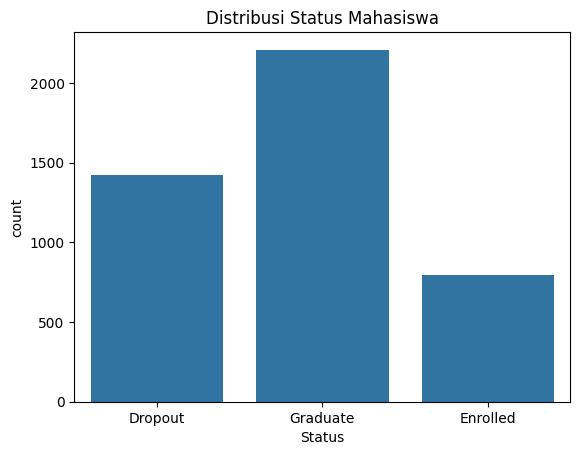

In [6]:
# Distribusi Status Mahasiswa
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Mahasiswa')
plt.show()

In [7]:
# Hitung jumlah mahasiswa per kategori Status
status_counts = df["Status"].value_counts()

text_status = "\n📊 Distribusi Status Mahasiswa:\n"
for status, count in status_counts.items():
    text_status += f"- {status}: {count} mahasiswa\n"

print(text_status)


📊 Distribusi Status Mahasiswa:
- Graduate: 2209 mahasiswa
- Dropout: 1421 mahasiswa
- Enrolled: 794 mahasiswa



### 2.3 Distribusi Fitur-Fitur Utama

Distribusi Nilai Admission Grade Berdasarkan Status

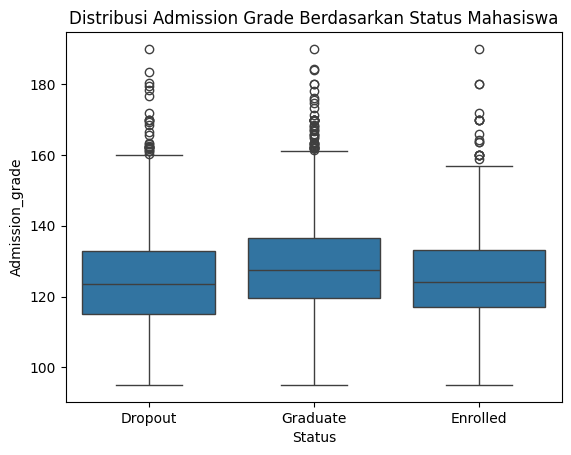

In [8]:
sns.boxplot(x='Status', y='Admission_grade', data=df)
plt.title('Distribusi Admission Grade Berdasarkan Status Mahasiswa')
plt.show()

Distribusi Usia Saat Pendaftaran

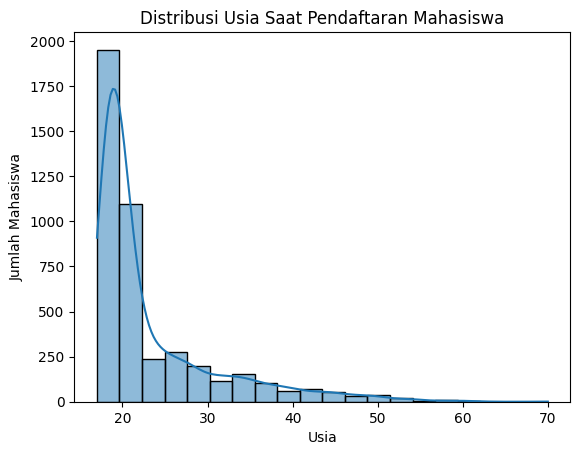

In [9]:
sns.histplot(df['Age_at_enrollment'], bins=20, kde=True)
plt.title('Distribusi Usia Saat Pendaftaran Mahasiswa')
plt.xlabel('Usia')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Analisis Pengaruh Beasiswa Terhadap Dropout

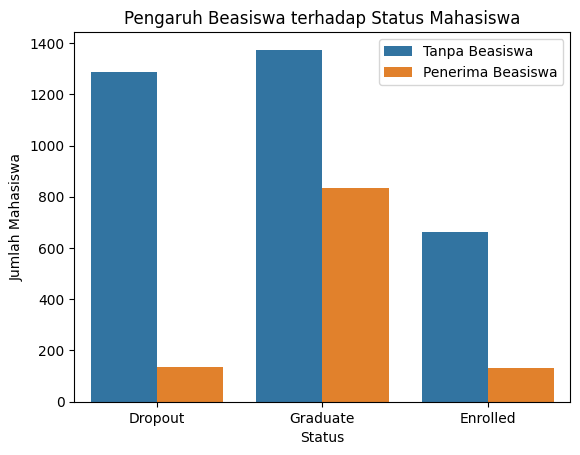

In [10]:
sns.countplot(x='Status', hue='Scholarship_holder', data=df)
plt.title('Pengaruh Beasiswa terhadap Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(['Tanpa Beasiswa', 'Penerima Beasiswa'])
plt.show()

In [11]:
# Statistik Admission Grade berdasarkan Status
admission_stats = df.groupby("Status")["Admission_grade"].describe()

text_admission = "\n📊 Distribusi Admission Grade Berdasarkan Status:\n"
for status in admission_stats.index:
    text_admission += f"- {status}: Min = {admission_stats.loc[status, 'min']}, Max = {admission_stats.loc[status, 'max']}, Mean = {admission_stats.loc[status, 'mean']:.2f}, Std = {admission_stats.loc[status, 'std']:.2f}\n"

# Statistik Usia saat Pendaftaran
age_stats = df["Age_at_enrollment"].describe()

text_age = "\n📊 Distribusi Usia Saat Pendaftaran:\n"
text_age += f"- Min = {age_stats['min']}, Max = {age_stats['max']}, Mean = {age_stats['mean']:.2f}, Std = {age_stats['std']:.2f}\n"

# Statistik Pengaruh Beasiswa terhadap Status
scholarship_counts = df.groupby("Status")["Scholarship_holder"].value_counts()

text_scholarship = "\n📊 Pengaruh Beasiswa terhadap Status:\n"
for (status, scholarship), count in scholarship_counts.items():
    beasiswa_text = "Penerima Beasiswa" if scholarship == 1 else "Tanpa Beasiswa"
    text_scholarship += f"- {status} ({beasiswa_text}): {count} mahasiswa\n"

# Gabungkan teks
text_distribution = text_admission + text_age + text_scholarship
print(text_distribution)


📊 Distribusi Admission Grade Berdasarkan Status:
- Dropout: Min = 95.0, Max = 190.0, Mean = 124.96, Std = 15.13
- Enrolled: Min = 95.0, Max = 190.0, Mean = 125.53, Std = 13.79
- Graduate: Min = 95.0, Max = 190.0, Mean = 128.79, Std = 14.07

📊 Distribusi Usia Saat Pendaftaran:
- Min = 17.0, Max = 70.0, Mean = 23.27, Std = 7.59

📊 Pengaruh Beasiswa terhadap Status:
- Dropout (Tanpa Beasiswa): 1287 mahasiswa
- Dropout (Penerima Beasiswa): 134 mahasiswa
- Enrolled (Tanpa Beasiswa): 664 mahasiswa
- Enrolled (Penerima Beasiswa): 130 mahasiswa
- Graduate (Tanpa Beasiswa): 1374 mahasiswa
- Graduate (Penerima Beasiswa): 835 mahasiswa



## 3. Data Preparation / Preprocessing

### 3.1 Mengatasi variabel kategorikal


Variabel kategorikal dalam dataset harus dikonversi ke format numerik agar dapat digunakan dalam model machine learning. Ada beberapa metode yang bisa digunakan:

1. **Label Encoding** → Cocok untuk variabel yang memiliki urutan logis.
2. **One-Hot Encoding** → Cocok untuk variabel kategorikal tanpa urutan tertentu.
3. **Mapping Manual** → Cocok untuk variabel dengan sedikit kategori.

1. Label Encoding (Variabel dengan Urutan):

    Metode ini mengonversi kategori menjadi angka, cocok untuk variabel yang memiliki urutan tertentu seperti *Marital Status* atau *Previous Qualification*.

In [12]:
# Daftar kolom yang akan di-label encoding
label_cols = ["Marital_status", "Daytime_evening_attendance", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder"]

# Melakukan Label Encoding
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Menyimpan encoder untuk nanti digunakan kembali jika perlu


2. One-Hot Encoding (Variabel Tanpa Urutan):

    Metode ini akan membuat kolom tambahan untuk setiap kategori yang ada, lalu kita menghapus satu kategori (drop_first=True) untuk menghindari multikolinearitas.

In [13]:
df = pd.get_dummies(df, columns=["Course", "Nacionality", "Mothers_qualification", "Fathers_qualification"], drop_first=True)


3. Mapping Manual (Variabel dengan Sedikit Kategori):

    Jika hanya ada beberapa kategori seperti variabel Status, kita bisa menggunakan metode manual.

In [14]:
status_mapping = {"Dropout": 0, "Enrolled": 1, "Graduate": 2}
df["Status_Numeric"] = df["Status"].map(status_mapping)

### 3.2 Normalisasi Variabel Numerik

Normalisasi bertujuan untuk menyamakan skala semua fitur numerik, sehingga tidak ada fitur yang mendominasi hanya karena memiliki nilai yang lebih besar. Ini sangat penting untuk algoritma seperti K-NN, SVM, dan Gradient Descent-based models (seperti logistic regression, neural network, dll).

Menentukan Fitur yang Akan Dinormalisasi:

Kita akan mengekstrak semua kolom numerik, lalu menghindari normalisasi pada target (*Status_Numeric*) karena itu adalah label.

In [15]:
# Memilih semua fitur numerik KECUALI kolom target
numerical_cols = df.select_dtypes(include=['number']).drop(columns=['Status_Numeric']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan normalisasi
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### 3.3 Pembagian Data *Train* dan *Test*

Sebelum memulai proses pelatihan model, dataset harus dibagi menjadi dua bagian:
- Data *Training* → Untuk melatih model agar belajar dari pola data.
- Data *Testing* → Untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

- Pisahkan Fitur dan Target

    Pastikan kita tidak menyertakan kolom `Status` asli yang masih berupa string, dan gunakan `Status_Numeric` sebagai label prediksi.

In [16]:
# X = fitur (selain Status dan Status_Numeric jika tidak relevan)
X = df.drop(columns=["Status", "Status_Numeric"])

# y = target (Status Numerik untuk prediksi dropout)
y = df["Status_Numeric"]

- Bagi Data dengan Stratifikasi

    Gunakan stratifikasi untuk menjaga proporsi kelas tetap seimbang di data training dan testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # menjaga proporsi label yang seimbang
)


Hasil *Train* dan *Test*

In [18]:
print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test : {X_test.shape[0]}")
print("\nDistribusi kelas pada data train:")
print(y_train.value_counts(normalize=True))


Jumlah data train: 3539
Jumlah data test : 885

Distribusi kelas pada data train:
Status_Numeric
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64


### 3.4 Reframing: Prediksi Risiko Dropout (Binary Classification)

Pada tahap ini, kita mengubah skenario prediksi dari tiga kelas (Dropout, Enrolled, Graduate) menjadi dua kelas saja:
- **1 = Mahasiswa Dropout (berisiko keluar)**
- **0 = Mahasiswa Tidak Dropout (baik masih Enrolled maupun sudah Graduate)**

Tujuannya adalah membangun model untuk mengenali **mahasiswa yang berisiko dropout**, sehingga sistem dapat memberikan _early warning_ kepada pihak akademik. Dengan pendekatan ini, kita lebih fokus pada penanganan dan intervensi untuk mahasiswa yang masih aktif.

In [19]:
# 3.4 Reframing: Binary Classification untuk Prediksi Dropout
df["Dropout_Label"] = df["Status"].apply(lambda x: 1 if x == "Dropout" else 0)

# Gunakan semua fitur selain label asli dan kolom string status
X = df.drop(columns=["Status", "Status_Numeric", "Dropout_Label"])
y = df["Dropout_Label"]

# Bagi data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Simpan Data

In [20]:
# Simpan dataset yang sudah diproses penuh (termasuk encoding dan normalisasi)
df.to_csv("data_preprocessed.csv", index=False)

In [21]:
# Setelah selesai training & preprocessing
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "rf_feature_names.pkl")


['rf_feature_names.pkl']

## 4. Modeling

Membangun model machine learning untuk memprediksi status mahasiswa berdasarkan fitur-fitur yang telah kita bersihkan dan proses sebelumnya. Kita akan mencoba beberapa algoritma dasar sebagai baseline untuk membandingkan performa.

### 4.1 Pemodelan Awal

Kita mulai dengan menggunakan 3 model untuk membandingkan model yang paling optimal:
1. **Logistic Regression**
2. **Random Forest**
3. **K-Nearest Neighbors (KNN)**

In [23]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Evaluasi tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n📊 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Tidak Dropout", "Dropout"]))

print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1],
    target_names=["Tidak Dropout", "Dropout"]
))


📊 Model: Logistic Regression
Accuracy: 0.8780
Classification Report:
               precision    recall  f1-score   support

Tidak Dropout       0.87      0.96      0.91       601
      Dropout       0.89      0.71      0.79       284

     accuracy                           0.88       885
    macro avg       0.88      0.83      0.85       885
 weighted avg       0.88      0.88      0.87       885


📊 Model: Random Forest
Accuracy: 0.8734
Classification Report:
               precision    recall  f1-score   support

Tidak Dropout       0.87      0.95      0.91       601
      Dropout       0.87      0.71      0.78       284

     accuracy                           0.87       885
    macro avg       0.87      0.83      0.85       885
 weighted avg       0.87      0.87      0.87       885


📊 Model: KNN
Accuracy: 0.7842
Classification Report:
               precision    recall  f1-score   support

Tidak Dropout       0.79      0.93      0.85       601
      Dropout       0.76      0.48 

#### 4.2 Hyperparameter Tuning – Random Forest (Binary Classification)

Setelah mengevaluasi model baseline, kita fokus pada penyetelan parameter model terbaik, yaitu **Random Forest**, dengan skenario klasifikasi biner (Dropout vs Tidak Dropout).  
Tuning dilakukan untuk mencari kombinasi parameter yang menghasilkan performa optimal berdasarkan akurasi dan kemampuan mendeteksi mahasiswa dropout (recall).

#### Menyiapkan Parameter Grid untuk Tuning

In [24]:
# 4.2 Tuning Random Forest untuk Prediksi Risiko Dropout
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # karena kita fokus pada deteksi kelas 1 (Dropout)
    n_jobs=-1,
    verbose=1
)

# Jalankan Grid Search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

## 5. Evaluation

### 5.1 Evaluasi Model Hasil Tuning

Setelah menjalankan Grid Search untuk Random Forest, kini kita evaluasi performa dari model terbaik yang ditemukan.  
Fokus utama evaluasi:
- Akurasi keseluruhan
- Precision, Recall, dan F1-score khusus untuk **kelas Dropout (1)**
- Visualisasi Confusion Matrix

📍 Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

📊 Evaluasi Model Random Forest (hasil tuning):
Accuracy: 0.8768
Classification Report:
               precision    recall  f1-score   support

Tidak Dropout       0.88      0.95      0.91       601
      Dropout       0.88      0.72      0.79       284

     accuracy                           0.88       885
    macro avg       0.88      0.84      0.85       885
 weighted avg       0.88      0.88      0.87       885



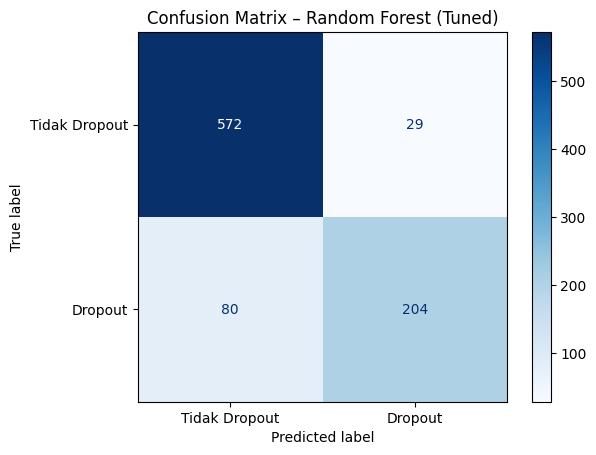

In [27]:
# Ambil model terbaik dari tuning
best_rf = grid_search.best_estimator_

# Prediksi di data test
y_pred_best = best_rf.predict(X_test)

# Evaluasi numerik
print("📍 Best Parameters:", grid_search.best_params_)
print("\n📊 Evaluasi Model Random Forest (hasil tuning):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=["Tidak Dropout", "Dropout"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Dropout", "Dropout"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest (Tuned)")
plt.show()


### 5.2 Simpan Model Final & Struktur Input

Agar model dapat digunakan kembali untuk deployment, prediksi manual, atau integrasi dengan aplikasi seperti dashboard Streamlit, model hasil tuning perlu disimpan dalam format `.pkl`.  
Selain itu, kita juga simpan daftar fitur (`feature_names`) agar input prediksi nantinya tetap konsisten dengan urutan saat training.


In [29]:
# Simpan model hasil tuning
joblib.dump(best_rf, "best_random_forest.pkl")

# Simpan struktur urutan kolom fitur
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "rf_feature_names.pkl")

print("✅ Model dan fitur berhasil disimpan!")


✅ Model dan fitur berhasil disimpan!


### 5.3 Visualisasi Proporsi Mahasiswa Berpotensi Dropout

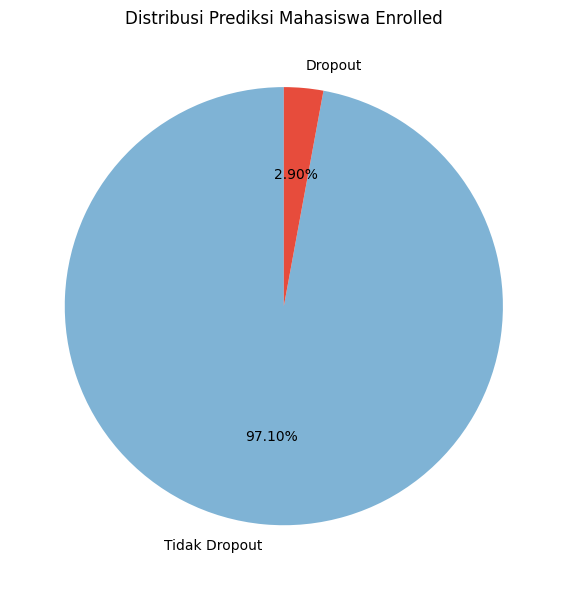

In [34]:
# Ambil data mahasiswa aktif
df_enrolled = df[df["Status"] == "Enrolled"].copy()

# Pastikan urutan kolom input sesuai saat training
X_enrolled = df_enrolled[feature_names]

# Prediksi batch terhadap mahasiswa aktif
df_enrolled["Pred_Label"] = best_rf.predict(X_enrolled)

# Hitung proporsi
counts = df_enrolled["Pred_Label"].value_counts(normalize=True).sort_index()
labels = ["Tidak Dropout", "Dropout"]
colors = ["#7FB3D5", "#E74C3C"]

# Visualisasi
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%.2f%%", startangle=90, colors=colors)
plt.title("Distribusi Prediksi Mahasiswa Enrolled")
plt.tight_layout()
plt.show()

### 5.4 Interpretasi Feature Importance – Random Forest (Binary)

Bagian ini bertujuan untuk mengidentifikasi fitur-fitur paling berpengaruh dalam model prediksi dropout.  
Nilai _feature importance_ mencerminkan seberapa besar kontribusi relatif suatu fitur dalam menentukan hasil prediksi model Random Forest.

Dengan informasi ini, institusi pendidikan dapat:
- Mendeteksi mahasiswa berisiko lebih awal
- Menyusun rekomendasi intervensi yang lebih tepat sasaran
- Menyederhanakan model ke fitur-fitur paling signifikan

Visualisasi bar chart akan menampilkan **10 fitur teratas** berdasarkan tingkat pengaruhnya dalam prediksi.



📊 Top 10 Fitur Terpenting dalam Prediksi Dropout:
                                   Fitur  Importance
26     Curricular_units_2nd_sem_approved    0.136721
27        Curricular_units_2nd_sem_grade    0.124388
20     Curricular_units_1st_sem_approved    0.095843
12               Tuition_fees_up_to_date    0.073572
21        Curricular_units_1st_sem_grade    0.069046
15                     Age_at_enrollment    0.040707
25  Curricular_units_2nd_sem_evaluations    0.035006
19  Curricular_units_1st_sem_evaluations    0.029606
8                        Admission_grade    0.029078
5           Previous_qualification_grade    0.025058


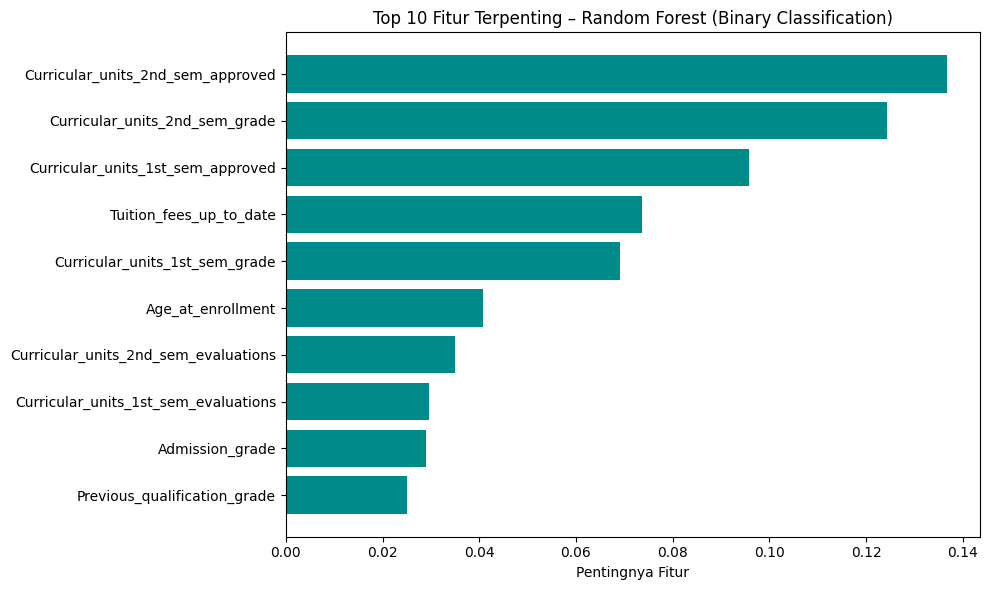

In [30]:
# Hitung feature importance
feature_importances = best_rf.feature_importances_
features = X_train.columns

# Buat DataFrame
importance_df = pd.DataFrame({
    "Fitur": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Tampilkan Top 10 Fitur Terpenting
print("\n📊 Top 10 Fitur Terpenting dalam Prediksi Dropout:")
print(importance_df.head(10))

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Fitur"][:10][::-1], importance_df["Importance"][:10][::-1], color="darkcyan")
plt.xlabel("Pentingnya Fitur")
plt.title("Top 10 Fitur Terpenting – Random Forest (Binary Classification)")
plt.tight_layout()
plt.show()


### Interpretasi:

Berdasarkan grafik feature importance, fitur paling berpengaruh terhadap prediksi dropout adalah:

1. **Curricular_units_2nd_sem_approved & grade**  
   → Semakin sedikit mata kuliah yang disetujui atau nilai rendah di semester 2, semakin tinggi risiko dropout.

2. **Curricular_units_1st_sem_approved & grade**  
   → Semester pertama juga tetap kritikal sebagai fondasi awal akademik mahasiswa.

3. **Tuition_fees_up_to_date**  
   → Mahasiswa yang memiliki tunggakan cenderung memiliki risiko dropout lebih tinggi, mungkin karena tekanan finansial.

4. **Evaluations (1st & 2nd semester)**  
   → Banyaknya evaluasi bisa berkaitan dengan keaktifan mahasiswa atau jumlah mata kuliah yang diambil.

5. **Admission_grade & Previous_qualification_grade**  
   → Nilai masuk kampus dan nilai sebelumnya menunjukkan seberapa siap mahasiswa saat memulai perkuliahan.

6. **Age_at_enrollment**  
   → Bisa jadi mencerminkan tantangan non-akademik; misalnya mahasiswa yang lebih tua mungkin memiliki beban tambahan seperti pekerjaan atau keluarga.

Kesimpulannya, kombinasi antara **kinerja akademik awal, kondisi keuangan, dan kesiapan awal mahasiswa** adalah sinyal dropout paling kuat menurut model.


## 6. Kesimpulan

Model prediksi dropout yang dibangun menggunakan Random Forest dengan pendekatan klasifikasi biner berhasil mencapai performa yang sangat baik:

- **Akurasi**: 87.68%
- **Recall untuk kelas Dropout**: 72%
- **F1-score Dropout**: 0.79
- **Fitur-fitur terpenting**:
  - Nilai & jumlah MK disetujui di semester 1 & 2
  - Status pembayaran biaya kuliah
  - Nilai masuk dan kesiapan akademik awal

Model ini tidak hanya memberikan prediksi yang akurat, tetapi juga mengungkap **indikator utama risiko dropout**, yang bisa dijadikan dasar strategi intervensi.

Seluruh pipeline juga telah disiapkan untuk digunakan ulang, baik dalam format file `.pkl` untuk deployment maupun dataset `.csv` untuk analisis lanjutan.

> Fokus ke mahasiswa aktif (Enrolled) dan deteksi dini dropout adalah langkah konkret menuju sistem pendidikan yang lebih adaptif, suportif, dan data-driven.

